# Medsoar Ventures Limited

**Author:** Chris Gitonga


# Overview

Medsoar Limited, known for its success in pharmaceuticals, is taking a new venture into the aviation sector. The company plans to buy and operate aircraft for both commercial and private clients. To make smart choices, it's using data science to analyze aviation records and performance metrics, helping identify the safest and most reliable planes. This approach ensures a smooth, efficient, and low-risk entry into the industry.

# Business Problem

Medsoar Limited is expanding into the aviation sector by acquiring and operating aircraft for commercial and private enterprises. However, entering a highly regulated and capital-intensive industry comes with significant risks, including safety concerns, operational costs, and aircraft reliability. The company needs a data-driven approach to identify the most suitable planes that minimize risk, optimize efficiency, and ensure long-term profitability. 

# Data Understanding

The data being used in the determining the aircrafts with the lowest risk for the company come from the National Transportation Safety Board that includes aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and international waters. This Data was obtained from Kaggle, a datascience platform which has multiple datasets From this data we can selectively filter out the airplanes that do not fit the company's goals

In [1070]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# the NTSB dataset
THe dataset contained two files;  AviationData.csv and USState_codes.csv

the dataset in AviationData.csv of the National Transportation Safety Board includes aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and international waters

In [1071]:
df=pd.read_csv('data/AviationData.csv', encoding="ISO-8859-1")
df.head()

c:\Users\chris\anaconda3\anaconda4\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


# USA-States Dataset

This dataset involves different USA states with their unique codes and it can be corelated to the location of where the aciidents happened in the AviationData.csv files


In [1072]:
state_code= pd.read_csv('data/USState_codes.csv')
state_code.head()

,US_State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


# Data Preparation

# AviationData Dataframe
First of all out of the 31 colums in the NTSB dataset, I decided to filter out 20 of the columns which i did not find meaningful or they were redundant in my sorting of data and decided to keep 10 relevant columns. I decided to create a new column, Total injuries which was to encompass Total fatal injuries, total serious and total minor injuries

In [1073]:
df['tot_injuries']=df['Total.Fatal.Injuries'] + df['Total.Serious.Injuries'] + df['Total.Minor.Injuries']

# Important columns
This were the 10 columns that were valuable in the goal of the objective


In [1074]:
imp_columns=['Event.Date','Location','Make','Model','Purpose.of.flight','Aircraft.damage','Injury.Severity', 'Amateur.Built','Engine.Type','Broad.phase.of.flight','tot_injuries']

In [1075]:
df=df[imp_columns]
df

,Event.Date,Location,Make,Model,Purpose.of.flight,Aircraft.damage,Injury.Severity,Amateur.Built,Engine.Type,Broad.phase.of.flight,tot_injuries
0,1948-10-24,"MOOSE CREEK, ID",Stinson,108-3,Personal,Destroyed,Fatal(2),No,Reciprocating,Cruise,2.0
1,1962-07-19,"BRIDGEPORT, CA",Piper,PA24-180,Personal,Destroyed,Fatal(4),No,Reciprocating,Unknown,4.0
2,1974-08-30,"Saltville, VA",Cessna,172M,Personal,Destroyed,Fatal(3),No,Reciprocating,Cruise,NaN
3,1977-06-19,"EUREKA, CA",Rockwell,112,Personal,Destroyed,Fatal(2),No,Reciprocating,Cruise,2.0
4,1979-08-02,"Canton, OH",Cessna,501,Personal,Destroyed,Fatal(1),No,NaN,Approach,NaN
...,...,...,...,...,...,...,...,...,...,...,...
88884,2022-12-26,"Annapolis, MD",PIPER,PA-28-151,Personal,NaN,Minor,No,NaN,NaN,1.0
88885,2022-12-26,"Hampton, NH",BELLANCA,7ECA,NaN,NaN,NaN,No,NaN,NaN,0.0
88886,2022-12-26,"Payson, AZ",AMERICAN CHAMPION AIRCRAFT,8GCBC,Personal,Substantial,Non-Fatal,No,NaN,NaN,0.0
88887,2022-12-26,"Morgan, UT",CESSNA,210N,Personal,NaN,NaN,No,NaN,NaN,0.0


In [1076]:
df.shape

(88889, 11)

Next step was to determine the information of the dataset available and how many null values it contained

In [1077]:
null_counts = df.isnull().sum()
print(null_counts)

Event.Date                   0
Location                    52
Make                        63
Model                       92
Purpose.of.flight         6192
Aircraft.damage           3194
Injury.Severity           1000
Amateur.Built              102
Engine.Type               7077
Broad.phase.of.flight    27165
tot_injuries             14466
dtype: int64


it looked loke all the columns apart from the event date had a null value. Since the main purpose of Medsoar Limited while entering the Aviation Sector is to oncur as little risk as possible in the new business, all null values in the Aircraft.damage,'Injury.Severity' were removed since this was a very crucial information.
Also since Medsoar plans to enter the commercial and private sector in the aviation business all aircrafts with null values are alsomremoved since we do not know their purpose. 
Make, Engine type and model null values were also removed since we do not know what aircraft it was

In [1078]:
df = df.dropna(axis=0, subset=["Make","Model","Purpose.of.flight","Aircraft.damage","Injury.Severity","Engine.Type","Location","Amateur.Built","Broad.phase.of.flight"])


df

,Event.Date,Location,Make,Model,Purpose.of.flight,Aircraft.damage,Injury.Severity,Amateur.Built,Engine.Type,Broad.phase.of.flight,tot_injuries
0,1948-10-24,"MOOSE CREEK, ID",Stinson,108-3,Personal,Destroyed,Fatal(2),No,Reciprocating,Cruise,2.0
1,1962-07-19,"BRIDGEPORT, CA",Piper,PA24-180,Personal,Destroyed,Fatal(4),No,Reciprocating,Unknown,4.0
2,1974-08-30,"Saltville, VA",Cessna,172M,Personal,Destroyed,Fatal(3),No,Reciprocating,Cruise,NaN
3,1977-06-19,"EUREKA, CA",Rockwell,112,Personal,Destroyed,Fatal(2),No,Reciprocating,Cruise,2.0
6,1981-08-01,"COTTON, MN",Cessna,180,Personal,Destroyed,Fatal(4),No,Reciprocating,Unknown,4.0
...,...,...,...,...,...,...,...,...,...,...,...
63906,2007-12-29,"Crowley, TX",Althouse,RAF 2000 GTX,Personal,Destroyed,Fatal(2),Yes,Reciprocating,Maneuvering,2.0
63908,2007-12-30,"CHEROKEE, AL",Bell,206L-3,Other Work Use,Substantial,Fatal(3),No,Turbo Shaft,Maneuvering,3.0
63909,2007-12-30,"PASO ROBLES, CA",Cirrus Design Corp.,SR22,Personal,Substantial,Fatal(1),No,Reciprocating,Maneuvering,NaN
63910,2007-12-30,"ALEXANDRIA, MN",Lerohl,RV-8,Personal,Substantial,Non-Fatal,Yes,Reciprocating,Takeoff,NaN


Since the 'tot_injuries' column is an important one for analysis and is a float, it contains too many missing values to drop all (14446 in total) I decided to replace the null with median

In [1079]:
df = df.copy() 
df['tot_injuries'] = df['tot_injuries'].fillna(df['tot_injuries'].median())

In [1080]:
null_counts = df.isnull().sum()
print(null_counts)

Event.Date               0
Location                 0
Make                     0
Model                    0
Purpose.of.flight        0
Aircraft.damage          0
Injury.Severity          0
Amateur.Built            0
Engine.Type              0
Broad.phase.of.flight    0
tot_injuries             0
dtype: int64


after dealing with the AviationData.csv Dataframe and ensuring all info lacks null values the next step was the USA-States Dataframe

# USA_States Dataset
In this set first of all i checked for null values

In [1081]:
null_counts = state_code.isnull().sum()
print(null_counts)

US_State        0
Abbreviation    0
dtype: int64


Since It has no missing value we can proceed to analyising data


## DATA ANALYSIS
After dealing with the null values. the  next step was data analysis

# Number of planes fitting the Purpose of Private and Commercial ventures

 The purpose of flight column was filtered to obtain planes that were for commercial and private enterprises since the main purpose of Medsoar limited is to enter those spaces. The column was filtered to obtain only for those purposes

In [1082]:
df['Purpose.of.flight'].unique()

array(['Personal', 'Business', 'Instructional', 'Unknown', 'Ferry',
       'Executive/corporate', 'Aerial Observation', 'Aerial Application',
       'Public Aircraft', 'Skydiving', 'Other Work Use', 'Positioning',
       'Flight Test', 'Air Race/show', 'Air Drop', 'Glider Tow',
       'Public Aircraft - Local', 'Public Aircraft - Federal',
       'External Load', 'Public Aircraft - State', 'Banner Tow',
       'Firefighting'], dtype=object)

from the above code we obtained the different unique purposes which each aircraft was being used for. SInce the purposes of Medsoar is in commercial and private ventures we will choose: Personal, Business, Executive/corprate and Ferry

In [1083]:
df = df[df["Purpose.of.flight"].isin(["Personal", "Business","Executive/corporate","Ferry"])]

df


,Event.Date,Location,Make,Model,Purpose.of.flight,Aircraft.damage,Injury.Severity,Amateur.Built,Engine.Type,Broad.phase.of.flight,tot_injuries
0,1948-10-24,"MOOSE CREEK, ID",Stinson,108-3,Personal,Destroyed,Fatal(2),No,Reciprocating,Cruise,2.0
1,1962-07-19,"BRIDGEPORT, CA",Piper,PA24-180,Personal,Destroyed,Fatal(4),No,Reciprocating,Unknown,4.0
2,1974-08-30,"Saltville, VA",Cessna,172M,Personal,Destroyed,Fatal(3),No,Reciprocating,Cruise,0.0
3,1977-06-19,"EUREKA, CA",Rockwell,112,Personal,Destroyed,Fatal(2),No,Reciprocating,Cruise,2.0
6,1981-08-01,"COTTON, MN",Cessna,180,Personal,Destroyed,Fatal(4),No,Reciprocating,Unknown,4.0
...,...,...,...,...,...,...,...,...,...,...,...
63904,2007-12-29,"CRYSTAL FALLS, MI",Cessna,172F,Personal,Substantial,Non-Fatal,No,Reciprocating,Landing,0.0
63905,2007-12-29,"ABINGDON, IL",Ercoupe (eng & Research Corp.),415D,Personal,Substantial,Non-Fatal,No,Reciprocating,Maneuvering,0.0
63906,2007-12-29,"Crowley, TX",Althouse,RAF 2000 GTX,Personal,Destroyed,Fatal(2),Yes,Reciprocating,Maneuvering,2.0
63909,2007-12-30,"PASO ROBLES, CA",Cirrus Design Corp.,SR22,Personal,Substantial,Fatal(1),No,Reciprocating,Maneuvering,0.0


In [1084]:
plane_purpose = df["Purpose.of.flight"].value_counts()
print(plane_purpose)

Personal               34981
Business                3300
Ferry                    657
Executive/corporate      402
Name: Purpose.of.flight, dtype: int64


These are the number of plane models that fit the purpose of Medsoar limited 

# The different types of Aircraft models

After determining how many types of aircrafts fit the goal of Medsoar limited, the next step was to determine the different makes of the airplanes available for chossing

In [1085]:
plane_make = df["Make"].unique()
print(plane_make)


['Stinson' 'Piper' 'Cessna' ... 'Hein' 'Althouse' 'Lerohl']


In [1086]:
num_unique_planes = df["Make"].nunique()

print(num_unique_planes)


3984


In [1087]:
plane_counts = df["Make"].value_counts()

print(plane_counts)


Cessna            13703
Piper              8224
Beech              2940
Mooney              940
Bellanca            672
                  ...  
Girard                1
Silvaggio             1
Wood-oldfield         1
Fleming               1
Waspair Tomcat        1
Name: Make, Length: 3984, dtype: int64


From the above data it was discovered that the CESSNA and cessna had each been classified as unique values yet they represented the same plane hence it had to be grouped as one to avoid improper analysis

In [1088]:
df = df.copy()
df["Make"] = df["Make"].str.lower()

print(df["Make"].unique())

['stinson' 'piper' 'cessna' ... 'hein' 'althouse' 'lerohl']


# Plane Manufacturer in relation to the number of fatalities and Aircraft Damage
In this section The aircrafts are further filtered to the ones with only minor aircraft damage while those with substantial and destroyed ones are dropped

In [1089]:
df=df[df['Aircraft.damage']== 'Minor']

df

,Event.Date,Location,Make,Model,Purpose.of.flight,Aircraft.damage,Injury.Severity,Amateur.Built,Engine.Type,Broad.phase.of.flight,tot_injuries
23,1982-01-03,"VAN NUYS, CA",piper,PA-24-180,Personal,Minor,Incident,No,Reciprocating,Approach,0.0
40,1982-01-05,"PENSACOLA, FL",rockwell,114,Business,Minor,Incident,No,Reciprocating,Cruise,0.0
119,1982-01-19,"WASHINGTON, DC",de havilland,DHC-6-300,Ferry,Minor,Incident,No,Turbo Prop,Descent,0.0
131,1982-01-20,"SAN JOSE, CA",piper,PA-31-350,Executive/corporate,Minor,Incident,No,Reciprocating,Takeoff,0.0
194,1982-01-30,"TRUCKEE, CA",piper,PA-28R-201T,Personal,Minor,Incident,No,Reciprocating,Landing,0.0
...,...,...,...,...,...,...,...,...,...,...,...
63182,2007-08-15,"Alton, IL",piper,PA-32R-301T,Business,Minor,Incident,No,Reciprocating,Descent,0.0
63347,2007-09-08,"Kerrville, TX",mooney,M20TN,Personal,Minor,Incident,No,Reciprocating,Landing,0.0
63490,2007-10-02,"Ashland, KY",degelia,Rotor Flight Dynamic,Personal,Minor,Non-Fatal,Yes,Reciprocating,Landing,0.0
63519,2007-10-06,"El Cajon, CA",yakovlev,YAK-50,Personal,Minor,Non-Fatal,No,Reciprocating,Landing,0.0


In [1090]:
import pandas as pd

# Assuming df is your DataFrame already filtered to only 'minor' in Aircraft.damage
# Count minor incidents by aircraft Make
minor_counts = df['Make'].value_counts().reset_index()
minor_counts.columns = ['Make', 'Minor_Incidents_Count']

# Sort by count (ascending to find least frequent)
minor_counts_sorted = minor_counts.sort_values('Minor_Incidents_Count')

# Get the manufacturer with least minor incidents
least_minor_make = minor_counts_sorted.iloc[0]

# Display results
print("Aircraft Manufacturer with Least Minor Incidents:")
print(f"Make: {least_minor_make['Make']}")
print(f"Number of Minor Incidents: {least_minor_make['Minor_Incidents_Count']}")

print("\nAll Manufacturers by Minor Incident Count (Ascending Order):")
print(minor_counts_sorted.to_string(index=False))



Aircraft Manufacturer with Least Minor Incidents:
Make: sprague
Number of Minor Incidents: 1

All Manufacturers by Minor Incident Count (Ascending Order):
                        Make  Minor_Incidents_Count
                     sprague                      1
      classic aircraft corp.                      1
                     dornier                      1
                       semco                      1
                      coelho                      1
                      barnes                      1
    new piper aircraft, inc.                      1
                    ultimate                      1
                     convair                      1
                     degelia                      1
                       maule                      1
                  starflight                      1
                     unknown                      1
                kolb company                      1
                  swearingen                      1
             

From the above inf there are a number of aircrafts with only 1 minor accident while the most was the Cessna Aircraft

A visualization was done to show the distribution in form of a bar graph of the top 10 Makes with the most minor accidents

In [1091]:
top_10_minor = df['Make'].value_counts().nlargest(10).reset_index()
top_10_minor.columns = ['Make', 'Minor_Accidents_Count']

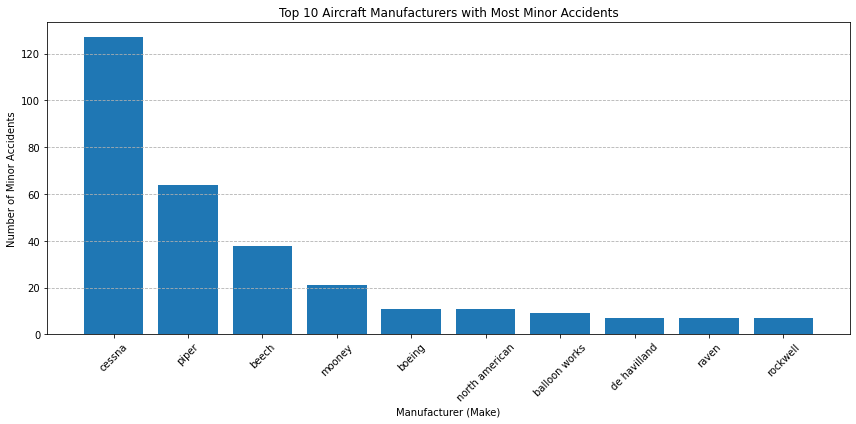

In [1092]:
plt.figure(figsize=(12, 6))
bars = plt.bar(top_10_minor['Make'], top_10_minor['Minor_Accidents_Count'],)

plt.title('Top 10 Aircraft Manufacturers with Most Minor Accidents')
plt.xlabel('Manufacturer (Make)')
plt.ylabel('Number of Minor Accidents')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')

plt.tight_layout()
plt.show()

After remaining with only aircrafts with minor damage, the next step was to filter all airplanes that had ever caused a fatality of more than 15 during time of service 

In [1093]:

# Group by Make and sum the total injuries
make_injuries = df.groupby('Make')['tot_injuries'].sum().reset_index()

# Filter out Makes with more than 15 total injuries
filtered_makes = make_injuries[make_injuries['tot_injuries'] <= 15]['Make']

filtered_df = df[df['Make'].isin(filtered_makes)]


print(f"Original: {df.shape}")
print(f"Filtered ): {filtered_df.shape}")



Original: (464, 11)
Filtered ): (337, 11)


In [1094]:
filtered_df

,Event.Date,Location,Make,Model,Purpose.of.flight,Aircraft.damage,Injury.Severity,Amateur.Built,Engine.Type,Broad.phase.of.flight,tot_injuries
23,1982-01-03,"VAN NUYS, CA",piper,PA-24-180,Personal,Minor,Incident,No,Reciprocating,Approach,0.0
40,1982-01-05,"PENSACOLA, FL",rockwell,114,Business,Minor,Incident,No,Reciprocating,Cruise,0.0
119,1982-01-19,"WASHINGTON, DC",de havilland,DHC-6-300,Ferry,Minor,Incident,No,Turbo Prop,Descent,0.0
131,1982-01-20,"SAN JOSE, CA",piper,PA-31-350,Executive/corporate,Minor,Incident,No,Reciprocating,Takeoff,0.0
194,1982-01-30,"TRUCKEE, CA",piper,PA-28R-201T,Personal,Minor,Incident,No,Reciprocating,Landing,0.0
...,...,...,...,...,...,...,...,...,...,...,...
63182,2007-08-15,"Alton, IL",piper,PA-32R-301T,Business,Minor,Incident,No,Reciprocating,Descent,0.0
63347,2007-09-08,"Kerrville, TX",mooney,M20TN,Personal,Minor,Incident,No,Reciprocating,Landing,0.0
63490,2007-10-02,"Ashland, KY",degelia,Rotor Flight Dynamic,Personal,Minor,Non-Fatal,Yes,Reciprocating,Landing,0.0
63519,2007-10-06,"El Cajon, CA",yakovlev,YAK-50,Personal,Minor,Non-Fatal,No,Reciprocating,Landing,0.0


# Cost of Operation

Since the goal of Medsoar limited while entering the airplane business is to have the lowest risk for the company. All amateur builds that were 'yes' were dropped since it will be difficult to fix the plane/ have insurance for the plane since they are not certified builders of planes

Additionaly all accidents that occcured before 1990 were dropped since the planes will be too old now to buy and expensive to maintain

In [1095]:
df = df.copy() 
df.loc[:, 'Event.Date'] = pd.to_datetime(df['Event.Date'])
df = df[df['Event.Date'].dt.year >= 1990].copy()
df


,Event.Date,Location,Make,Model,Purpose.of.flight,Aircraft.damage,Injury.Severity,Amateur.Built,Engine.Type,Broad.phase.of.flight,tot_injuries
24854,1990-02-04,"TOMBALL, TX",cessna,150M,Personal,Minor,Fatal(1),No,Reciprocating,Approach,1.0
25046,1990-03-11,"TITUSVILLE, FL",stinson,AT-19,Personal,Minor,Incident,No,Reciprocating,Takeoff,0.0
25131,1990-03-25,"AUGUSTA, GA",mooney,M-20L,Personal,Minor,Incident,No,Reciprocating,Takeoff,0.0
25482,1990-05-15,"DAYTONA BEACH, FL",boeing,A75N1,Personal,Minor,Non-Fatal,No,Reciprocating,Taxi,0.0
25517,1990-05-20,"COEUR D'ALENE, ID",swearingen,SA226-T(B),Personal,Minor,Fatal(1),No,Turbo Prop,Taxi,1.0
...,...,...,...,...,...,...,...,...,...,...,...
63182,2007-08-15,"Alton, IL",piper,PA-32R-301T,Business,Minor,Incident,No,Reciprocating,Descent,0.0
63347,2007-09-08,"Kerrville, TX",mooney,M20TN,Personal,Minor,Incident,No,Reciprocating,Landing,0.0
63490,2007-10-02,"Ashland, KY",degelia,Rotor Flight Dynamic,Personal,Minor,Non-Fatal,Yes,Reciprocating,Landing,0.0
63519,2007-10-06,"El Cajon, CA",yakovlev,YAK-50,Personal,Minor,Non-Fatal,No,Reciprocating,Landing,0.0


In [1096]:
df=df[df['Amateur.Built']=='No']
df

,Event.Date,Location,Make,Model,Purpose.of.flight,Aircraft.damage,Injury.Severity,Amateur.Built,Engine.Type,Broad.phase.of.flight,tot_injuries
24854,1990-02-04,"TOMBALL, TX",cessna,150M,Personal,Minor,Fatal(1),No,Reciprocating,Approach,1.0
25046,1990-03-11,"TITUSVILLE, FL",stinson,AT-19,Personal,Minor,Incident,No,Reciprocating,Takeoff,0.0
25131,1990-03-25,"AUGUSTA, GA",mooney,M-20L,Personal,Minor,Incident,No,Reciprocating,Takeoff,0.0
25482,1990-05-15,"DAYTONA BEACH, FL",boeing,A75N1,Personal,Minor,Non-Fatal,No,Reciprocating,Taxi,0.0
25517,1990-05-20,"COEUR D'ALENE, ID",swearingen,SA226-T(B),Personal,Minor,Fatal(1),No,Turbo Prop,Taxi,1.0
...,...,...,...,...,...,...,...,...,...,...,...
63053,2007-07-28,"Suffolk, VA",powrachute corp.,Pegasus 912M,Personal,Minor,Non-Fatal,No,Reciprocating,Climb,0.0
63182,2007-08-15,"Alton, IL",piper,PA-32R-301T,Business,Minor,Incident,No,Reciprocating,Descent,0.0
63347,2007-09-08,"Kerrville, TX",mooney,M20TN,Personal,Minor,Incident,No,Reciprocating,Landing,0.0
63519,2007-10-06,"El Cajon, CA",yakovlev,YAK-50,Personal,Minor,Non-Fatal,No,Reciprocating,Landing,0.0


From the above Data 196 aircrafts generally fitted Medsoar limited goal for aircrafts with the lowest risk for the company

# Most Common Engine Type

This was to aid in which engine was used with most of the makes which are least likely to have a serious accident 

In [1097]:


engine_type_counts = df['Engine.Type'].value_counts(dropna=True).sort_values(ascending=False)

most_common_engine = engine_type_counts.index[0]
most_common_engine_count = engine_type_counts.iloc[0]

print(f"Most common Engine Type: {most_common_engine}")
print(f"Count:{most_common_engine_count} ")
print(engine_type_counts)

Most common Engine Type: Reciprocating
Count:141 
Reciprocating    141
Turbo Fan         18
Unknown           17
Turbo Prop        13
Turbo Shaft        5
Turbo Jet          2
Name: Engine.Type, dtype: int64


# Graph of the Most common Engine

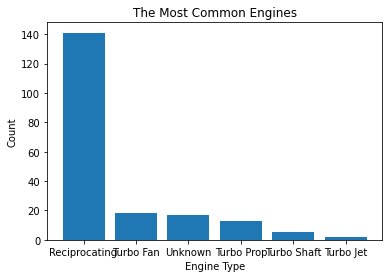

In [1098]:
bar_chart_title = "The Most Common Engines"

fig, ax = plt.subplots()
ax.bar(x=engine_type_counts.index, height=engine_type_counts)
ax.set_xlabel("Engine Type")
ax.set_ylabel("Count")
ax.set_title(bar_chart_title);

From the information the most common engine was found to be the reciprocating engine and hence the least crashed rate

# Number of Airplanes which meets the company function and their division

In [1099]:
plane_purpose = df["Purpose.of.flight"].value_counts()
print(plane_purpose)

Personal               152
Business                30
Executive/corporate      8
Ferry                    6
Name: Purpose.of.flight, dtype: int64


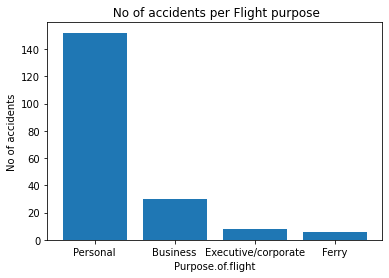

In [1100]:
bar_chart_title = " No of accidents per Flight purpose"

fig, ax = plt.subplots()
ax.bar(x=plane_purpose.index, height=plane_purpose)
ax.set_xlabel("Purpose.of.flight")
ax.set_ylabel("No of accidents")
ax.set_title(bar_chart_title);

# Recommendations


### 1) The best engine Type


the purpose of determining the engine type was to prevent the company from going for aeroplanes with the least reliable engines and the ones prone to regular accidents
From the analysis it was determined that the Reciprocating engine was the best engine followed by the Turbo fan and the turbo prop engines.
Choosing any of these engines was determined to reduce the company's risk in terms of failure and accidents hence reducing costs

## 2) Which Business venture should the company prioritize

The purpose of determining which airplane purpose had the least risk of an accident was important in determining which the direction the company will go
From the data analysis  the number of personal aircrafts had the most number of aaccidents hence I would recommend the company to reduce the private/personal ventures
The commercial planes had the least accidents. This could be due to better servicing of the plane, better pilots and much more better plane equipments

## 3 Which aircraft was found to be the safest
 A number of aircrafts were found to have a minor accident damage with the least number of total injuries but the one that stood out is the Cessna, Piper and Beech airplanes which rarely had substansial damages after an accident or a high number of total injuries exceding 15

In [1101]:
# Changing filtered information to excel for use in tableu
df.to_excel('./data/Filtered_Aviation_Data.xlsx',index=False)